In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
np.random.seed(seed=10)

In [5]:
X_min = 4

In [6]:
X_max = 30

In [7]:
X_n = 16

In [8]:
X = 5 + 25 *np.random.rand(X_n)

In [9]:
X

array([24.28301608,  5.51879873, 20.84120587, 23.72009706, 17.46267531,
       10.61991614,  9.95157162, 24.0132678 ,  9.22777091,  7.20849535,
       22.13399546, 28.83483365,  5.09870666, 17.80480658, 25.31552404,
       20.31315167])

In [10]:
Prm_c = [ 170, 108, 0.2]

In [11]:
T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * X) + 4 * np.random.randn(X_n)

In [12]:
T

array([165.29983694, 138.29792869, 169.24273864, 170.84056247,
       162.16783711, 157.62866517, 161.17968173, 164.79432317,
       145.03180769, 137.48175213, 169.77339036, 179.20191195,
       135.54043653, 173.62204695, 169.71340092, 173.73398504])

In [13]:
X = np.round(X,2)

In [14]:
X

array([24.28,  5.52, 20.84, 23.72, 17.46, 10.62,  9.95, 24.01,  9.23,
        7.21, 22.13, 28.83,  5.1 , 17.8 , 25.32, 20.31])

In [15]:
T = np.round(T,2)

In [16]:
T

array([165.3 , 138.3 , 169.24, 170.84, 162.17, 157.63, 161.18, 164.79,
       145.03, 137.48, 169.77, 179.2 , 135.54, 173.62, 169.71, 173.73])

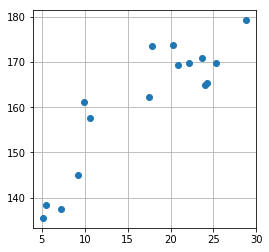

In [20]:
plt.figure(figsize=(4,4))

plt.plot(X, T, marker='o', linestyle='None')

plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

In [21]:
from mpl_toolkits.mplot3d import Axes3D

In [26]:
def mse_line(x, t, w) :
    y = w[0] * x + w[1]
    mse = np.mean((y-t)**2) 
    return mse


In [28]:
xn = 100
w0_range = [-25,25]
w1_range = [120, 170]

x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)

xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))

for i0 in range(xn) :
    for i1 in range(xn) :
        J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))

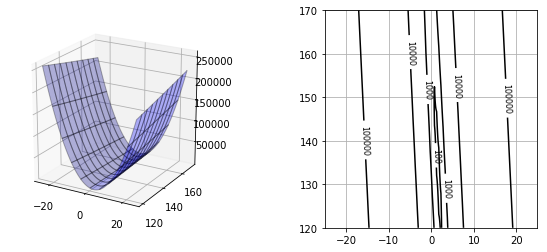

In [32]:
plt.figure(figsize=(9.5,4))

plt.subplots_adjust(wspace=0.5)

ax = plt.subplot(1,2,1, projection='3d')
ax.plot_surface(xx0, xx1, J, rstride=10, cstride=10, alpha=0.3, color='blue', edgecolor='black')

ax.set_xticks([-20, 0 , 20])
ax.set_yticks([120,140, 160])
ax.view_init(20, -60)


plt.subplot(1,2,2)
cont = plt.contour(xx0, xx1, J, 30, colors='black', levels=[100, 1000, 10000, 100000])
cont.clabel(fmt="%1.0f", fontsize=8)
plt.grid(True)